In [2]:
""" 1.取得資料
"""
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
"""2.Preprocessing 資料前處理、切分成訓練資料與驗證資料
"""
from sklearn.model_selection import train_test_split

data = iris.data
target = iris.target
sepal = data[:,0:2]
x_train , x_test,y_train,y_test = train_test_split(sepal,target)
# x_train , x_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

print("隨機挑選 ",len(x_train)," 筆資料進行訓練")
print("隨機挑選 ",len(x_test)," 筆資料做最後驗證")
print("shape of test data : ",x_test.shape)

隨機挑選  112  筆資料進行訓練
隨機挑選  38  筆資料做最後驗證
shape of test data :  (38, 2)


In [3]:
"""3.Training 使用KNN進行訓練
"""
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# 訓練
iris_clf = knn.fit(x_train,y_train)
print(iris_clf.__class__)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


In [4]:
"""4.Validation 驗證模型
用測試資料評估數學模型的好壞，最簡單的方式就是比較預測資料與原始資料的結果是否相符，依照預測正確的數量來計算正確率(Accuracy)。
"""
# do the validation
y_predict = iris_clf.predict(x_test)
print("原始結果 original result:")
print(y_test)
print("預測結果 predicted result:")
print(y_predict)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy(正確率) ={:8.3f}%".format(accuracy*100))

原始結果 original result:
[0 1 2 1 0 0 2 0 1 2 0 2 0 1 1 2 2 1 0 0 1 0 1 0 0 1 0 0 1 2 2 0 0 2 0 0 2
 2]
預測結果 predicted result:
[0 1 1 1 0 0 2 0 1 1 0 1 0 1 1 2 1 1 0 0 2 0 2 0 0 1 0 0 2 2 2 0 0 1 0 0 2
 1]
Accuracy(正確率) =  76.316%


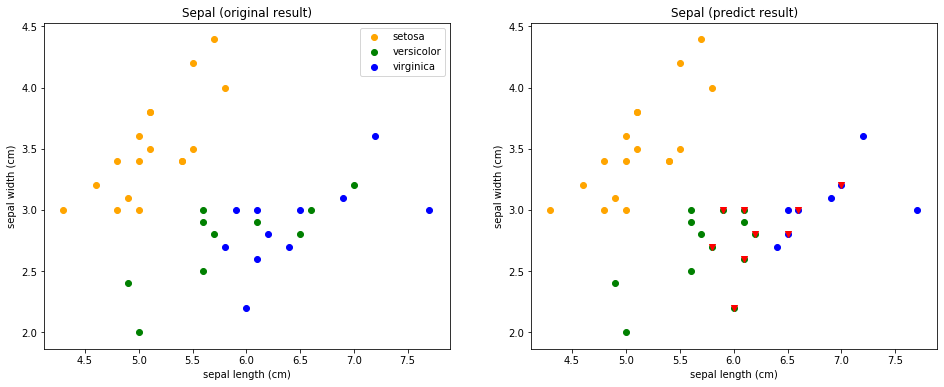

In [5]:
"""5.1 Plotting 作圖
比照原始結果與預測結果的不同，預測錯誤的點使用紅色標出
"""
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt1 = plt.subplot(1,2,1)
# 測試資料 的 原始結果
sepal_length = x_test[:,0]
sepal_width = x_test[:,1]
plt1.scatter(sepal_length[y_test==0],sepal_width[y_test==0],c='orange')
plt1.scatter(sepal_length[y_test==1],sepal_width[y_test==1],c='green')
plt1.scatter(sepal_length[y_test==2],sepal_width[y_test==2],c='blue')
# 加上圖示
plt1.legend(iris.target_names)
# 加上標題
plt1.set_title('Sepal (original result)')
plt1.set_xlabel(iris.feature_names[0])
plt1.set_ylabel(iris.feature_names[1])


# 測試資料的預測結果
plt2 =  plt.subplot(1,2,2)
plt2.scatter(sepal_length[y_predict==0],sepal_width[y_predict==0],c='orange')
plt2.scatter(sepal_length[y_predict==1],sepal_width[y_predict==1],c='green')
plt2.scatter(sepal_length[y_predict==2],sepal_width[y_predict==2],c='blue')
plt2.scatter(sepal_length[y_predict!=y_test],sepal_width[y_predict!=y_test],c='red',marker='v')
# 加上圖示
plt1.legend(iris.target_names)
# 加上標題
plt2.set_title('Sepal (predict result)')
plt2.set_xlabel(iris.feature_names[0])
plt2.set_ylabel(iris.feature_names[1])
plt.show()

"""練習Lab02-2:使用KNN 預測酒的種類，看看正確率有多少。
複習重點1.了解如何使用不同的資料集
複習重點2.了解資料科學領域的步驟
複習重點3.嘗試了解不同分類器不同參數的用途。
"""
from sklearn.datasets import load_wine

wine = load_wine()
data = wine.data
win= data[:,0:4]




[[3.8  3.82 3.84 ... 8.14 8.16 8.18]
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]
 ...
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]
 [3.8  3.82 3.84 ... 8.14 8.16 8.18]]
[[1.5  1.5  1.5  ... 1.5  1.5  1.5 ]
 [1.52 1.52 1.52 ... 1.52 1.52 1.52]
 [1.54 1.54 1.54 ... 1.54 1.54 1.54]
 ...
 [4.86 4.86 4.86 ... 4.86 4.86 4.86]
 [4.88 4.88 4.88 ... 4.88 4.88 4.88]
 [4.9  4.9  4.9  ... 4.9  4.9  4.9 ]]


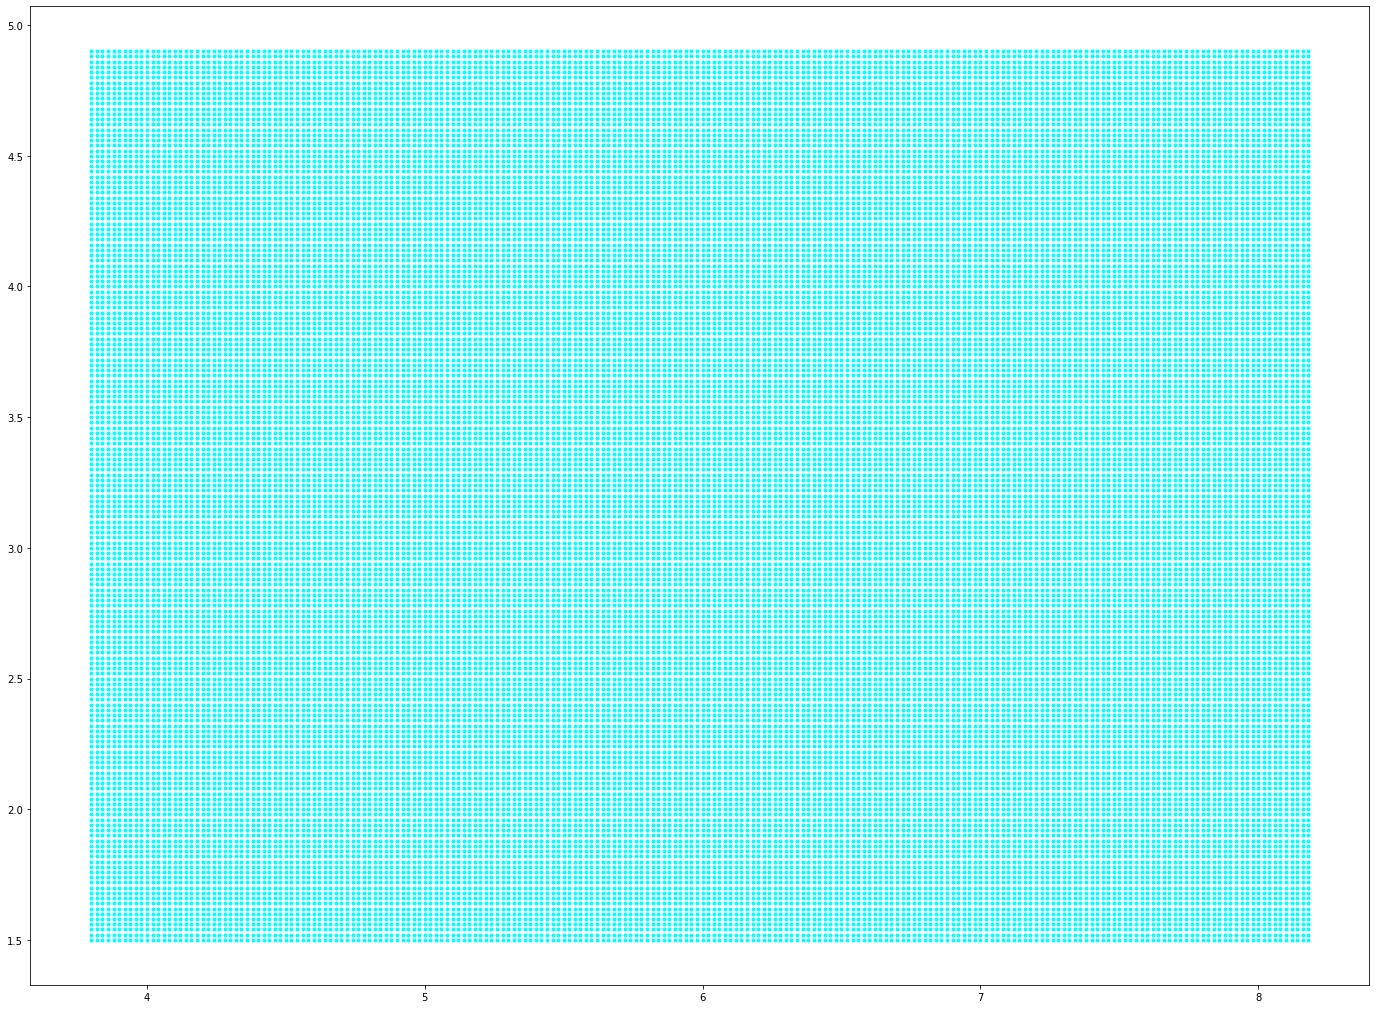

In [6]:
"""5.2 產生大量的座標點，用這些座標點來繪製KNN的模型樣貌
學習重點:了解numpy 中 meshgrid的用法
"""
# 開新一張圖
plt.figure(figsize=(24,18))
sepal_length_max , sepal_length_min = sepal_length.max()+0.5,sepal_length.min()-0.5
sepal_width_max , sepal_width_min = sepal_width.max()+0.5,sepal_width.min()-0.5

import numpy as np
# meshgrid -> 在一個範圍中產生大量的座標點
xx , yy = np.meshgrid(np.arange(sepal_length_min,sepal_length_max,0.02),np.arange(sepal_width_min,sepal_width_max,0.02))
print(xx)
print(yy)

# 密集恐懼症者注意
plt.scatter(xx,yy,marker='.',c='aqua')

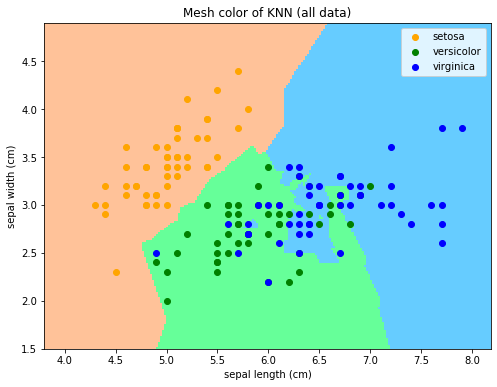

In [7]:
"""5.3 繪製KNN的樣貌
用剛剛產生的虛擬座標點丟進去模型，我們可以得到預測的結果，這樣就可以用這些結果來繪製模型的樣子。
學習重點:透過pcolormesh繪製KNN的樣子

"""

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#ffc299', '#66ff99', '#66ccff'])
plt.figure(figsize=(8,6))

# ravel()將這些資料轉換成一維陣列的形式
Z = iris_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(sepal[:,0][target==0],sepal[:,1][target==0],c='orange')
plt.scatter(sepal[:,0][target==1],sepal[:,1][target==1],c='green')
plt.scatter(sepal[:,0][target==2],sepal[:,1][target==2],c='blue')
plt.title('Mesh color of KNN (all data)')
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()